# Recurrent neural networks

In [1]:
import csv
import itertools
import nltk
import sys

import numpy as np


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [2]:
vocabulary_size = 75

with open("Dane/kod.txt") as f:
    sentences = f.readlines()

In [3]:
sentences = [s for s in sentences if s.strip() != '']

In [4]:
sentences[:10]

['class RNNNumpy:\n',
 '    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):\n',
 '        # Assign instance variables\n',
 '        self.word_dim = word_dim\n',
 '        self.hidden_dim = hidden_dim\n',
 '        self.bptt_truncate = bptt_truncate\n',
 '        # Randomly initialize the network parameters\n',
 '        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))\n',
 '        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))\n',
 '        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))\n']

In [5]:
tokenized_sentences = [list(sent) for sent in sentences]

In [6]:
tokenized_sentences[:3]

[['c',
  'l',
  'a',
  's',
  's',
  ' ',
  'R',
  'N',
  'N',
  'N',
  'u',
  'm',
  'p',
  'y',
  ':',
  '\n'],
 [' ',
  ' ',
  ' ',
  ' ',
  'd',
  'e',
  'f',
  ' ',
  '_',
  '_',
  'i',
  'n',
  'i',
  't',
  '_',
  '_',
  '(',
  's',
  'e',
  'l',
  'f',
  ',',
  ' ',
  'w',
  'o',
  'r',
  'd',
  '_',
  'd',
  'i',
  'm',
  ',',
  ' ',
  'h',
  'i',
  'd',
  'd',
  'e',
  'n',
  '_',
  'd',
  'i',
  'm',
  '=',
  '1',
  '0',
  '0',
  ',',
  ' ',
  'b',
  'p',
  't',
  't',
  '_',
  't',
  'r',
  'u',
  'n',
  'c',
  'a',
  't',
  'e',
  '=',
  '4',
  ')',
  ':',
  '\n'],
 [' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  '#',
  ' ',
  'A',
  's',
  's',
  'i',
  'g',
  'n',
  ' ',
  'i',
  'n',
  's',
  't',
  'a',
  'n',
  'c',
  'e',
  ' ',
  'v',
  'a',
  'r',
  'i',
  'a',
  'b',
  'l',
  'e',
  's',
  '\n']]

In [7]:
vocab = np.unique([item for sublist in tokenized_sentences for item in sublist]) 
index_to_word = [x[0] for x in vocab]

word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print( "Using vocabulary size %d." % len(vocab))

# Create the training data
X_train = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences])
y_train = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences])


print( "\nExample sentence: '%s'" % sentences[0])
print( "\nExample sentence after Pre-processing: '%s'" % tokenized_sentences[0])
print( X_train[0])
print( y_train[0])

Using vocabulary size 75.

Example sentence: 'class RNNNumpy:
'

Example sentence after Pre-processing: '['c', 'l', 'a', 's', 's', ' ', 'R', 'N', 'N', 'N', 'u', 'm', 'p', 'y', ':', '\n']'
[50, 59, 48, 66, 66, 1, 37, 34, 34, 34, 68, 60, 63, 72, 19]
[59, 48, 66, 66, 1, 37, 34, 34, 34, 68, 60, 63, 72, 19, 0]


In [8]:
X_train.shape

(150,)

In [9]:
class RNNNumpy:
     
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))



In [10]:
def forward_propagation(self, x):
    # The total number of time steps
    T = len(x)
    # During forward propagation we save all hidden states in s because need them later.
    # We add one additional element for the initial hidden, which we set to 0
    h = np.zeros((T + 1, self.hidden_dim))
    h[-1] = np.zeros(self.hidden_dim)
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))
    # For each time step...
    for t in np.arange(T):
        # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
         
        x_t =  np.eye(len(vocab))[x[t]] # Kodowanie one-hot. 
                                        # Formalnie rzecz biorac, x_t jest gotowym wektorem wprowadzanym do sieci,
                                        # ale dla wygody tu przetwarzamy indeks na wektor
        
        h[t] = np.tanh(np.dot(self.U, x_t) + np.dot(self.W, h[t-1])) # obliczanie stanu ukrytego
        o[t] = softmax(np.dot(self.V, h[t])) # predykcja dla x_t
                                             # uwaga: w zalenosci od problemu bedzie nas interesowac 
                                             #        kazda predykcja lub tylko ostatnia
        
    return [o, h]
 
RNNNumpy.forward_propagation = forward_propagation

In [11]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)
 
RNNNumpy.predict = predict

In [12]:
# Test:

np.random.seed(10)
model = RNNNumpy(vocabulary_size)
o, s = model.forward_propagation(X_train[10])
print(o.shape)
print(o)

(33, 75)
[[ 0.0137885   0.01259464  0.01312937 ...,  0.0121929   0.01291467
   0.01447739]
 [ 0.01307076  0.01411536  0.01411408 ...,  0.01378971  0.01418804
   0.01405048]
 [ 0.01281134  0.01272381  0.01326489 ...,  0.01275765  0.01318253
   0.01373512]
 ..., 
 [ 0.01314944  0.01428113  0.01362903 ...,  0.01324931  0.0143878
   0.01310582]
 [ 0.013139    0.01351207  0.0123365  ...,  0.01295007  0.01473019
   0.0127632 ]
 [ 0.01313058  0.01459512  0.01356838 ...,  0.01243141  0.01246906
   0.01237279]]


In [13]:
predictions = model.predict(X_train[10])
print(predictions.shape)
print(predictions)

(33,)
[58 68  5 56 45 67 11 42 69 11 26 48 58 11 53  1 68 15 69 52 20 24 46 27 34
 21 24  5 57 56 69 73 49]


In [14]:
def calculate_total_loss(self, x, y):
    L = 0
    # For each sentence...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # Add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L
 
def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N

RNNNumpy.calculate_total_loss = calculate_total_loss
RNNNumpy.calculate_loss = calculate_loss

In [15]:
# Limit to 1000 examples to save time
print("Loss for random predictions: %f" % np.log(vocabulary_size))
print("Actual loss: %f" % model.calculate_loss(X_train[:1000], y_train[:1000]))

Loss for random predictions: 4.317488
Actual loss: 4.324430


In [16]:
def bptt(self, x, y):
    T = len(y)
    # Perform forward propagation
    o, s = self.forward_propagation(x)
    
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            dLdU[:,x[bptt_step]] += delta_t
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdU, dLdV, dLdW]
 
RNNNumpy.bptt = bptt

In [17]:
import datetime
import time

# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
 
RNNNumpy.sgd_step = numpy_sdg_step
# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(self, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5 
                print("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            self.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1
    return(losses)

RNNNumpy.train_with_sgd = train_with_sgd
            
np.random.seed(10)
model = RNNNumpy(vocabulary_size)
%timeit model.sgd_step(X_train[10], y_train[10], 0.005)

100 loops, best of 3: 10.1 ms per loop


In [18]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNNumpy(vocabulary_size)
losses = model.train_with_sgd(X_train, y_train, nepoch=100, evaluate_loss_after=1)

Setting learning rate to 0.002500
Setting learning rate to 0.001250
Setting learning rate to 0.000625
Setting learning rate to 0.000313
Setting learning rate to 0.000156
Setting learning rate to 0.000078


In [19]:
def generate_text(s,n=3):
    """
    
    Funkcja przewiduje n nastepnych liter dla podanegou tekstu (napisu) s.
    
    """
    s = list(s)
    
    X_new = np.asarray([[word_to_index[w] for w in sent] for sent in s])[:,0]
    
    pred = np.zeros(n,dtype="int")
    for i in range(n):
        pred[i] = model.predict(np.concatenate([X_new, pred[:i]]))[-1]
    print("original: ", ''.join([x[0] for x in s]) )
    print("prediction: ", ''.join([x[0] for x in s])+''.join([[index_to_word[w] for w in sent] for sent in [pred]][0]))

In [30]:
generate_text('la', 3)

original:  la
prediction:  late 


In [35]:
generate_text('pri', 5)

original:  pri
prediction:  print("%


In [33]:
generate_text('r', 20)

original:  r
prediction:  renum_oralen if ranum


In [34]:
generate_text('R', 20)

original:  R
prediction:  RNNNumpy.calculate_to


In [36]:
generate_text('R', 100)

original:  R
prediction:  RNNNumpy.calculate_total_loss(self, x, y):
(x[n])
, forea_d_pracanin  h time toumeftime(tor(sed_dielo


### Case study: IMBD

In [37]:
# IMDB dataset CERTIFICATE_VERIFY_FAILED exception workaround
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [38]:
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional

from keras.callbacks import EarlyStopping

from keras.datasets import imdb

Using TensorFlow backend.


In [46]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 3

In [47]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train[:3])

25000 train sequences
25000 test sequences
[ [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
 [1, 194, 1153, 194, 2, 78, 22

In [50]:
x_train.shape

(25000,)

In [51]:
# Przetworzenie danych:

# Padding
# uzupelnienie zerami aby wyrownac wielkosc tablic
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
x_train.shape

(25000, 400)

In [52]:
x_train[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [55]:
y_train[:3]

array([1, 0, 0])

In [53]:
n_train = 5000
n_test = 2000
x_train = x_train[:n_train]
y_train = y_train[:n_train]
x_test = x_test[:n_train]
y_test = y_test[:n_train]

## Embeddingi

Przeanalizujmy co się dzieje w RNN, gdy podajemy słowa w reprezentacji one hot.

## $$ h_t = f( W^h * h_{t-1} + W^x * x_t + b)$$

Zatem jeśli x to "one-hot" z 1 na pozycji i to:

## $$ W^x * x_t = W^x[:,i],  $$

Czyli wkład informacji embeddinga sprowadza się do wzięcia odpowieniej kolumny macierzy wag.

Czyli i-ta kolumna macierzy wag jest w pewnym sensie reprezentacją słowa i.

Zatem pójdźmy krok dalej: stwórzmy sobie dodatkową warstwę w sieci, zawierającą reprezentacje słów, które będą przekazywane do wyliczenia stanu ukrytego.


Wówczas sieć z warstwą embeddingów ma postać:

$x_t$ - id słowa wejściowego w momencie $t$.

$EMB$ - macierz embeddingów

<br>

$$emb_t = EMB[x_t]$$
$$ h_t = f( W^h * h_{t-1} + W^x * emb_t + b)$$

<br>

Ta warstwa nazywa się EMBEDDING'ami (embedding layer).


<img src="https://image.slidesharecdn.com/translatefrombadenglishtogoodone-2-160606105036/95/aibigdata-lab-2016-11-638.jpg?cb=1465210454" width="700">
Źródło: https://www.slideshare.net/Geeks_Lab/aibigdata-lab-2016-62764857



### Zauważmy, że embeddingi są parametrami sieci, ale jednocześnie reprezentacją słów. Oznacza to, że trenując sieć, uczymy embeddingi, czyli uczymy się reprezentacji słów.


### Zadania

### Zwykład sieć rekurencyjna ( z embeddingami)

In [57]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=5, monitor='val_loss')

model.fit(x_train, y_train, epochs=100, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

Train on 3750 samples, validate on 1250 samples
Epoch 1/100
3750/3750 [==============================] - 35s - loss: 0.6980 - acc: 0.5061 - val_loss: 0.6906 - val_acc: 0.5104
Epoch 2/100
3750/3750 [==============================] - 35s - loss: 0.6704 - acc: 0.5925 - val_loss: 0.6780 - val_acc: 0.5632
Epoch 3/100
3750/3750 [==============================] - 35s - loss: 0.6210 - acc: 0.6904 - val_loss: 0.6718 - val_acc: 0.5632
Epoch 4/100
3750/3750 [==============================] - 36s - loss: 0.5114 - acc: 0.7693 - val_loss: 0.6366 - val_acc: 0.6392
Epoch 5/100
3750/3750 [==============================] - 38s - loss: 0.4692 - acc: 0.7912 - val_loss: 0.6532 - val_acc: 0.6224
Epoch 6/100
3750/3750 [==============================] - 39s - loss: 0.5149 - acc: 0.7504 - val_loss: 0.6504 - val_acc: 0.6232
Epoch 7/100
3750/3750 [==============================] - 42s - loss: 0.4077 - acc: 0.8099 - val_loss: 0.6884 - val_acc: 0.6408
Epoch 8/100
3750/3750 [==============================] - 41s - 

In [58]:
model.evaluate(x_test, y_test)[1]

5000/5000 [==============================] - 14s    


0.67300000000000004

### Simple RNN + dense pomiędzy zwracanym stanem ukrytym a outputem

In [60]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SimpleRNN(100))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=batch_size, validation_split=0.25)

Train on 3750 samples, validate on 1250 samples
Epoch 1/3
3750/3750 [==============================] - 42s - loss: 0.6956 - acc: 0.4997 - val_loss: 0.6889 - val_acc: 0.5336
Epoch 2/3
3750/3750 [==============================] - 44s - loss: 0.6395 - acc: 0.6480 - val_loss: 0.5999 - val_acc: 0.6832
Epoch 3/3
3750/3750 [==============================] - 44s - loss: 0.4428 - acc: 0.8045 - val_loss: 0.5157 - val_acc: 0.7624


In [61]:
model.evaluate(x_test, y_test)[1]

5000/5000 [==============================] - 15s    


0.77439999999999998

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 275,301
Trainable params: 275,301
Non-trainable params: 0
_________________________________________________________________


## Dwuwarstwowa sieć rekurencyjna

In [64]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SimpleRNN(100, return_sequences=True))
model.add(SimpleRNN(50))

model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=batch_size, validation_split=0.25)

Train on 3750 samples, validate on 1250 samples
Epoch 1/3
3750/3750 [==============================] - 83s - loss: 0.7198 - acc: 0.4997 - val_loss: 0.6969 - val_acc: 0.4896
Epoch 2/3
3750/3750 [==============================] - 83s - loss: 0.6981 - acc: 0.5125 - val_loss: 0.6941 - val_acc: 0.5136
Epoch 3/3
3750/3750 [==============================] - 92s - loss: 0.6871 - acc: 0.5389 - val_loss: 0.6856 - val_acc: 0.5264


In [65]:
model.evaluate(x_test, y_test)[1]

5000/5000 [==============================] - 32s    


0.51300000000000001

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 400, 100)          15100     
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 50)                7550      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 277,851
Trainable params: 277,851
Non-trainable params: 0
_________________________________________________________________


## Dwukierunkowa sieć rekurencyjna

In [69]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))

model.add(Bidirectional(SimpleRNN(100)))

model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=batch_size, validation_split=0.25)

Train on 3750 samples, validate on 1250 samples
Epoch 1/3
3750/3750 [==============================] - 50s - loss: 0.7062 - acc: 0.4893 - val_loss: 0.7025 - val_acc: 0.5104
Epoch 2/3
3750/3750 [==============================] - 51s - loss: 0.6855 - acc: 0.5499 - val_loss: 0.6803 - val_acc: 0.5280
Epoch 3/3
3750/3750 [==============================] - 51s - loss: 0.5320 - acc: 0.7307 - val_loss: 0.5668 - val_acc: 0.6728


In [70]:
model.evaluate(x_test, y_test)[1]

5000/5000 [==============================] - 22s    


0.68720000000000003

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               30200     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 300,401
Trainable params: 300,401
Non-trainable params: 0
_________________________________________________________________


### Dwukierunkowa sieć rekurencyjna + dense

# LSTM


### Zadanie. Powtórz powyższe modele z komórką LSTM

Przyjąć patience = 1 w early stoppingu.

In [71]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(patience=2, monitor='val_loss')

model.fit(x_train, y_train, epochs=100, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

model.evaluate(x_test, y_test)[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 310,501
Trainable params: 310,501
Non-trainable params: 0
_________________________________________________________________
Train on 3750 samples, validate on 1250 samples
Epoch 1/100
3750/3750 [==============================] - 215s - loss: 0.6646 - acc: 0.6109 - val_loss: 0.5826 - val_acc: 0.7184
Epoch 2/100
3750/3750 [==============================] - 239s - loss: 0.4128 - acc: 0.8216 - val_loss: 0.5023 - val_acc: 0.7632
Epoch 3/100
3750/3750 [==============================] - 224s - loss: 0.2408 - acc: 0.9075 - val

0.79700000000000004

### Case study: Analiza sentymentu

Zaprogramować eksperymenty i puścić przed wyjściem na obiad.

1. Simple RNN
2. LSTM - porównaj na zbiorze testowym jakość działania modelu wziętego z najlepszej iteracji oraz modelu po zatrzymaniu uczenia
3. LSTM + warstwa dense na końcu
4. BiLSTM
5. dwuwarstwowy LSTM
6. CNN + LSTM - przepuścić dane przez warstwę konwolucyjną (conv1d) + max pooling, a następnie przejechać LSTM'em po tym wyszło.

In [72]:
import numpy as np

file_with_filtered_embeddings = "Dane/data_poleval/embeddings.txt"

words2ids = {}
embeddings = []

embeddings.append(np.zeros(300)) # rezerwujemy embeddingi na paddin i nieznane slowa
embeddings.append(np.zeros(300))

i = 0
with open(file_with_filtered_embeddings,"r") as f:
    for line in f:
        toks = line.split(" ")
        word = toks[0]
        embeddings.append(np.array([float(x) for x in toks[1:]]))
        words2ids[word] = i+2 # +3 - przesuniecie po to zeby specjalne embeddingi byly na pozycji 0 i 1
        i = i + 1


embeddings = np.array(embeddings)
print(embeddings.shape)

(5000, 300)


In [73]:
words2ids

{'mają': 2,
 'cytrusów': 3,
 'ponadto': 4,
 'pięknej': 5,
 'pudrowego': 6,
 'produkt': 7,
 'brodzików': 8,
 'U': 9,
 'podziwu': 10,
 'słowem': 11,
 'diabłem': 12,
 'malarze': 13,
 'mój': 14,
 'przestać': 15,
 'whiskey': 16,
 'żadnej': 17,
 'Swój': 18,
 'pieprzową': 19,
 'figury': 20,
 'kupować': 21,
 'pozostałych': 22,
 'komplety': 23,
 'zamachu': 24,
 'dalekosiężne': 25,
 'leżą': 26,
 'aprobatą': 27,
 'bujnym': 28,
 'podobieństwa': 29,
 'sukienki': 30,
 'uciemiężone': 31,
 'koszulę': 32,
 'koszuli': 33,
 'koszule': 34,
 'dłużej': 35,
 'wypuści': 36,
 'tworząc': 37,
 'rekompensuje': 38,
 'przecudowny': 39,
 'wyróżniających': 40,
 'należytemu': 41,
 'konkretnych': 42,
 'święto': 43,
 'patologiem': 44,
 'przeciętnej': 45,
 'Donatellę': 46,
 'powstańcza': 47,
 'testu': 48,
 'mieszkania': 49,
 'tę': 50,
 'adekwatna': 51,
 'oczekiwaniami': 52,
 'natomiast': 53,
 'polecenia': 54,
 'nasz': 55,
 'Można': 56,
 'Uwielbiam': 57,
 'sprawców': 58,
 'Używała': 59,
 'wyjątkowy': 60,
 'kolorze': 61,
 

In [74]:
embeddings[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [75]:
embeddings[2]

array([ 0.68923  , -0.728562 , -0.67156  ,  0.452569 ,  1.48135  ,
       -0.713579 ,  1.27009  , -0.427368 ,  0.908545 , -1.30073  ,
       -0.742945 ,  2.13016  ,  2.15647  , -0.657836 , -1.43292  ,
       -0.432578 , -0.370477 ,  0.788179 , -0.439624 , -1.42123  ,
        0.310941 ,  1.36179  ,  0.0817599, -1.7725   , -2.02928  ,
       -1.27779  ,  0.776984 , -0.589031 , -2.23493  , -1.11084  ,
        2.1565   , -0.0829913,  1.62006  ,  2.88058  , -1.30103  ,
       -1.09147  , -0.391706 , -0.708378 ,  0.576634 , -1.87945  ,
        1.01122  , -2.27341  , -2.89224  , -0.21766  ,  2.39044  ,
       -0.969998 ,  1.07507  ,  0.668908 ,  0.393559 ,  0.0897984,
       -0.539963 ,  2.9958   , -2.62722  ,  1.317    , -0.59901  ,
       -2.1971   , -1.61251  ,  0.313467 ,  1.80279  , -0.0893186,
        0.704141 , -1.02295  , -1.42039  ,  2.33347  , -2.55586  ,
       -1.478    ,  1.61922  ,  2.75623  , -0.383152 , -0.52249  ,
       -2.45576  ,  2.1599   , -1.4243   , -0.343521 ,  1.2754

In [76]:
from keras.preprocessing import sequence as seq

In [77]:
def load_and_transform_data_to_phrases(labels, parents, tokens, words2ids):

    """
    Dokumentacja
    """
    

    transform_label = {'-1':0, '0':1, '1':2}
    
    l = open(labels, "r")
    labels = [[transform_label[y] for y in x.split()] for x in l.readlines()] 
    l.close()

    p = open(parents,"r")
    parents = [[int(y) for y in x.split()] for x in p.readlines()]
    p.close()

    t = open(tokens,"r")
    tokens = [x.split() for x in t.readlines()]
    t.close()
    
    k = 0
    result = []
    
    for labels_i,parents_i,tokens_i in zip(labels,parents,tokens):
        
        k = k + 1
         
        s = []
        for i in range(len(tokens_i)):
            s.append([i,int(parents_i[i]),labels_i[i],tokens_i[i]])


        if len(s) == 1: #przypadek gdy fraza sklada sie z jednego tokena

            result.append((\
                                  tokens[0],
                                  np.array([words2ids.get(tokens[0], 1)]),\
                                  np.array(labels_i[0]) \
                              ))    
                           
        else: 
            
            for i in range(len(s)): 
                children = []
                for j in range(len(s)):
                    if s[j][1] == i+1:
                        children.append(s[j][0])
                s[i].append(children)

                
            words = [x[0] for x in s]
            children = [x[4] for x in s]
            tokens = [x[3] for x in s]
            labels_in_batch = [x[2] for x in s]
        
            phrases = [[k] for k in range(len(children))]
            for i in range(len(children)):
                for e in phrases[i]:
                    phrases[i].extend(children[e])
           
            phrases = [ np.sort(x) for x in phrases]
          
            phrases = list(zip([np.array(tokens_i)[x] for x in phrases],
                               [np.array([words2ids.get(t,1) for t in tokens_i])[x] for x in phrases],
                               labels_i))

            result.extend(phrases)
           
    return result

In [78]:
train_data = load_and_transform_data_to_phrases("Dane/data_poleval/training-treebank/rev_labels.txt", "Dane/data_poleval/training-treebank/rev_parents.txt","Dane/data_poleval/training-treebank/rev_sentence.txt",words2ids)
test_data = load_and_transform_data_to_phrases("Dane/data_poleval/gold_labels", "Dane/data_poleval/poleval_test/polevaltest_parents.txt","Dane/data_poleval/poleval_test/polevaltest_sentence.txt",words2ids) 

In [81]:
# 2 - pozytywny
# 1 - neutralny
# 0 - negatywny
train_data[:15]

[(array(['Słodkawy'], 
        dtype='<U8'), array([2731]), 1),
 (array(['Słodkawy', 'i', 'pełen', 'klasy', '.'], 
        dtype='<U8'), array([2731, 1746, 1465,  515,    1]), 1),
 (array(['pełen'], 
        dtype='<U8'), array([1465]), 2),
 (array(['pełen', 'klasy'], 
        dtype='<U8'), array([1465,  515]), 2),
 (array(['.'], 
        dtype='<U8'), array([1]), 1),
 (array(['Letnia'], 
        dtype='<U13'), array([1277]), 1),
 (array(['Letnia', 'propozycja', 'dla', 'wysmakowanych', 'mężczyzn', '.'], 
        dtype='<U13'), array([1277, 1570, 3893, 1789, 3526,    1]), 2),
 (array(['dla', 'wysmakowanych', 'mężczyzn'], 
        dtype='<U13'), array([3893, 1789, 3526]), 2),
 (array(['wysmakowanych'], 
        dtype='<U13'), array([1789]), 1),
 (array(['wysmakowanych', 'mężczyzn'], 
        dtype='<U13'), array([1789, 3526]), 2),
 (array(['.'], 
        dtype='<U13'), array([1]), 1),
 (array(['Raczej', 'nie', 'dla', 'młodych', 'chłopców', '.'], 
        dtype='<U8'), array([3458, 4205, 

In [80]:
import pandas as pd

(X_train, y_train), \
(X_test, y_test) = \
( [x[1] for x in train_data], np.array(pd.get_dummies(np.array([x[2] for x in train_data]))) ) , \
( [x[1] for x in test_data], np.array(pd.get_dummies(np.array([x[2] for x in test_data]))) ) 

In [82]:
X_train[:5]

[array([2731]),
 array([2731, 1746, 1465,  515,    1]),
 array([1465]),
 array([1465,  515]),
 array([1])]

In [83]:
y_train[:5]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [84]:
max_len = np.max([len(x[1]) for x in train_data+test_data])
print(max_len)

40


In [85]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=max_len,value=0)
X_test = sequence.pad_sequences(X_test, maxlen=max_len,value=0)

In [86]:
X_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 2731],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 2731, 1746, 1465,  515,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 1465],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [87]:
X_train.shape

(9510, 40)

In [88]:
# Rozklad klas
print(np.mean(y_train,axis=0))
np.mean(y_test,axis=0)

[ 0.02355415  0.7809674   0.19547844]


array([ 0.07232019,  0.7263721 ,  0.20130771])

In [89]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense, LSTM, SimpleRNN, Bidirectional, Activation

from keras.callbacks import EarlyStopping

n_embeddings = embeddings.shape[0] # zawiera 1 na brakujace slowa i 1 na padding
embedding_vecor_length = 300

### Cel: zbudować jak najlepszą sieć klasyfikującą wydźwięk fraz. 

Sugestia: przeanalizować poprzednie model z różnymi parametrami.

In [114]:
# Simple RNN

In [115]:
n_embeddings, X_train.shape

(5000, (9510, 40))

In [116]:
model = Sequential()

model.add(Embedding(n_embeddings, embedding_vecor_length, input_length=max_len, weights=[embeddings]))
model.add(SimpleRNN(100))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(patience=2, monitor='val_loss')

model.fit(X_train, y_train, epochs=30, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

Train on 7132 samples, validate on 2378 samples
Epoch 1/30
7132/7132 [==============================] - 16s - loss: 0.5636 - categorical_accuracy: 0.7657 - val_loss: 0.5383 - val_categorical_accuracy: 0.7738
Epoch 2/30
7132/7132 [==============================] - 16s - loss: 0.4169 - categorical_accuracy: 0.8365 - val_loss: 0.4833 - val_categorical_accuracy: 0.8108
Epoch 3/30
7132/7132 [==============================] - 16s - loss: 0.3679 - categorical_accuracy: 0.8596 - val_loss: 0.4651 - val_categorical_accuracy: 0.8171
Epoch 4/30
7132/7132 [==============================] - 16s - loss: 0.3349 - categorical_accuracy: 0.8755 - val_loss: 0.4497 - val_categorical_accuracy: 0.8318
Epoch 5/30
7132/7132 [==============================] - 15s - loss: 0.3093 - categorical_accuracy: 0.8878 - val_loss: 0.4414 - val_categorical_accuracy: 0.8415
Epoch 6/30
7132/7132 [==============================] - 15s - loss: 0.2875 - categorical_accuracy: 0.8986 - val_loss: 0.4397 - val_categorical_accuracy:

In [117]:
model.evaluate(X_test, y_test)[1]

5024/5047 [============================>.] - ETA: 0s

0.77848226675213461

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 40, 300)           1500000   
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 100)               40100     
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 303       
Total params: 1,540,403
Trainable params: 1,540,403
Non-trainable params: 0
_________________________________________________________________


In [119]:
# LSTM - porównaj na zbiorze testowym jakość działania modelu wziętego z najlepszej iteracji oraz modelu po zatrzymaniu uczenia

In [120]:
model = Sequential()

model.add(Embedding(n_embeddings, embedding_vecor_length, input_length=max_len, weights=[embeddings]))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(patience=2, monitor='val_loss')

model.fit(X_train, y_train, epochs=30, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

Train on 7132 samples, validate on 2378 samples
Epoch 1/30
7132/7132 [==============================] - 58s - loss: 0.6987 - categorical_accuracy: 0.7650 - val_loss: 0.6023 - val_categorical_accuracy: 0.7611
Epoch 2/30
7132/7132 [==============================] - 55s - loss: 0.4972 - categorical_accuracy: 0.8044 - val_loss: 0.5327 - val_categorical_accuracy: 0.7733
Epoch 3/30
7132/7132 [==============================] - 59s - loss: 0.4455 - categorical_accuracy: 0.8236 - val_loss: 0.4949 - val_categorical_accuracy: 0.7939
Epoch 4/30
7132/7132 [==============================] - 63s - loss: 0.4150 - categorical_accuracy: 0.8392 - val_loss: 0.4702 - val_categorical_accuracy: 0.8053
Epoch 5/30
7132/7132 [==============================] - 68s - loss: 0.3920 - categorical_accuracy: 0.8493 - val_loss: 0.4513 - val_categorical_accuracy: 0.8116
Epoch 6/30
7132/7132 [==============================] - 61s - loss: 0.3732 - categorical_accuracy: 0.8568 - val_loss: 0.4365 - val_categorical_accuracy:

In [121]:
model.evaluate(X_test, y_test)[1]

5047/5047 [==============================] - 8s     


0.79552209220216941

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 40, 300)           1500000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 303       
Total params: 1,660,703
Trainable params: 1,660,703
Non-trainable params: 0
_________________________________________________________________


In [123]:
# LSTM + warstwa dense na końcu

In [124]:
model = Sequential()

model.add(Embedding(n_embeddings, embedding_vecor_length, input_length=max_len, weights=[embeddings]))
model.add(LSTM(100))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(patience=2, monitor='val_loss')

model.fit(X_train, y_train, epochs=30, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

Train on 7132 samples, validate on 2378 samples
Epoch 1/30
7132/7132 [==============================] - 75s - loss: 0.5967 - categorical_accuracy: 0.7895 - val_loss: 0.6439 - val_categorical_accuracy: 0.7553
Epoch 2/30
7132/7132 [==============================] - 71s - loss: 0.5701 - categorical_accuracy: 0.7895 - val_loss: 0.6295 - val_categorical_accuracy: 0.7553
Epoch 3/30
7132/7132 [==============================] - 71s - loss: 0.5592 - categorical_accuracy: 0.7895 - val_loss: 0.6216 - val_categorical_accuracy: 0.7553
Epoch 4/30
7132/7132 [==============================] - 70s - loss: 0.5464 - categorical_accuracy: 0.7895 - val_loss: 0.6049 - val_categorical_accuracy: 0.7553
Epoch 5/30
7132/7132 [==============================] - 71s - loss: 0.5325 - categorical_accuracy: 0.7895 - val_loss: 0.5983 - val_categorical_accuracy: 0.7553
Epoch 6/30
7132/7132 [==============================] - 72s - loss: 0.5164 - categorical_accuracy: 0.7902 - val_loss: 0.5791 - val_categorical_accuracy:

In [125]:
model.evaluate(X_test, y_test)[1]

5024/5047 [============================>.] - ETA: 0s

0.79532395469473927

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 40, 300)           1500000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 303       
Total params: 1,670,803
Trainable params: 1,670,803
Non-trainable params: 0
_________________________________________________________________


In [127]:
# BiLSTM

In [128]:
model = Sequential()

model.add(Embedding(n_embeddings, embedding_vecor_length, input_length=max_len, weights=[embeddings]))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(patience=2, monitor='val_loss')

model.fit(X_train, y_train, epochs=30, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

Train on 7132 samples, validate on 2378 samples
Epoch 1/30
7132/7132 [==============================] - 82s - loss: 0.6846 - categorical_accuracy: 0.7709 - val_loss: 0.6155 - val_categorical_accuracy: 0.7557
Epoch 2/30
7132/7132 [==============================] - 72s - loss: 0.5190 - categorical_accuracy: 0.7963 - val_loss: 0.5573 - val_categorical_accuracy: 0.7645
Epoch 3/30
7132/7132 [==============================] - 72s - loss: 0.4723 - categorical_accuracy: 0.8125 - val_loss: 0.5177 - val_categorical_accuracy: 0.7763
Epoch 4/30
7132/7132 [==============================] - 75s - loss: 0.4412 - categorical_accuracy: 0.8245 - val_loss: 0.4871 - val_categorical_accuracy: 0.7952
Epoch 5/30
7132/7132 [==============================] - 80s - loss: 0.4175 - categorical_accuracy: 0.8330 - val_loss: 0.4649 - val_categorical_accuracy: 0.8019
Epoch 6/30
7132/7132 [==============================] - 82s - loss: 0.3981 - categorical_accuracy: 0.8444 - val_loss: 0.4488 - val_categorical_accuracy:

In [129]:
model.evaluate(X_test, y_test)[1]

5047/5047 [==============================] - 12s    


0.79770160478390106

In [130]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 40, 300)           1500000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 603       
Total params: 1,821,403
Trainable params: 1,821,403
Non-trainable params: 0
_________________________________________________________________


In [131]:
# dwuwarstwowy LSTM

In [132]:
model = Sequential()

model.add(Embedding(n_embeddings, embedding_vecor_length, input_length=max_len, weights=[embeddings]))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(patience=2, monitor='val_loss')

model.fit(X_train, y_train, epochs=30, batch_size=batch_size, callbacks=[early_stopping], validation_split=0.25)

Train on 7132 samples, validate on 2378 samples
Epoch 1/30
7132/7132 [==============================] - 107s - loss: 0.6853 - categorical_accuracy: 0.7815 - val_loss: 0.6396 - val_categorical_accuracy: 0.7553
Epoch 2/30
7132/7132 [==============================] - 121s - loss: 0.5662 - categorical_accuracy: 0.7895 - val_loss: 0.6135 - val_categorical_accuracy: 0.7553
Epoch 3/30
7132/7132 [==============================] - 100s - loss: 0.5475 - categorical_accuracy: 0.7895 - val_loss: 0.6011 - val_categorical_accuracy: 0.7553
Epoch 4/30
7132/7132 [==============================] - 98s - loss: 0.5327 - categorical_accuracy: 0.7891 - val_loss: 0.5850 - val_categorical_accuracy: 0.7536
Epoch 5/30
7132/7132 [==============================] - 100s - loss: 0.5183 - categorical_accuracy: 0.7876 - val_loss: 0.5754 - val_categorical_accuracy: 0.7515
Epoch 6/30
7132/7132 [==============================] - 99s - loss: 0.5039 - categorical_accuracy: 0.7873 - val_loss: 0.5613 - val_categorical_accur

In [133]:
model.evaluate(X_test, y_test)[1]

5047/5047 [==============================] - 16s    


0.78482266680094093

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 40, 300)           1500000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 40, 100)           160400    
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 153       
Total params: 1,690,753
Trainable params: 1,690,753
Non-trainable params: 0
_________________________________________________________________


### Modelowanie szeregów czasowych

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

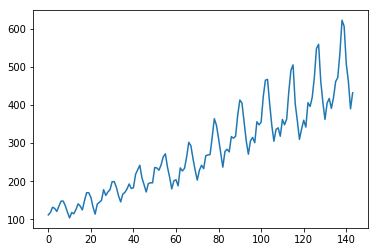

In [325]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('Dane/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

In [326]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [327]:
numpy.random.seed(7)

In [328]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [329]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

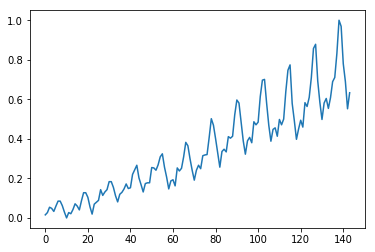

In [330]:
plt.plot(dataset)
plt.show()

In [331]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [332]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [341]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [342]:
#reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [343]:
trainX[:10]

array([[[ 0.01544401,  0.02702703,  0.05405405]],

       [[ 0.02702703,  0.05405405,  0.04826255]],

       [[ 0.05405405,  0.04826255,  0.03281853]],

       [[ 0.04826255,  0.03281853,  0.05984557]],

       [[ 0.03281853,  0.05984557,  0.08494207]],

       [[ 0.05984557,  0.08494207,  0.08494207]],

       [[ 0.08494207,  0.08494207,  0.06177607]],

       [[ 0.08494207,  0.06177607,  0.02895753]],

       [[ 0.06177607,  0.02895753,  0.        ]],

       [[ 0.02895753,  0.        ,  0.02702703]]], dtype=float32)

In [ ]:
trainY[:10]

In [344]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,validation_split=0.1)

Train on 82 samples, validate on 10 samples
Epoch 1/100
0s - loss: 0.0543 - val_loss: 0.2018
Epoch 2/100
0s - loss: 0.0256 - val_loss: 0.1309
Epoch 3/100
0s - loss: 0.0163 - val_loss: 0.0934
Epoch 4/100
0s - loss: 0.0137 - val_loss: 0.0752
Epoch 5/100
0s - loss: 0.0126 - val_loss: 0.0681
Epoch 6/100
0s - loss: 0.0117 - val_loss: 0.0602
Epoch 7/100
0s - loss: 0.0107 - val_loss: 0.0532
Epoch 8/100
0s - loss: 0.0100 - val_loss: 0.0454
Epoch 9/100
0s - loss: 0.0090 - val_loss: 0.0427
Epoch 10/100
0s - loss: 0.0082 - val_loss: 0.0372
Epoch 11/100
0s - loss: 0.0074 - val_loss: 0.0321
Epoch 12/100
0s - loss: 0.0066 - val_loss: 0.0269
Epoch 13/100
0s - loss: 0.0060 - val_loss: 0.0210
Epoch 14/100
0s - loss: 0.0055 - val_loss: 0.0191
Epoch 15/100
0s - loss: 0.0049 - val_loss: 0.0201
Epoch 16/100
0s - loss: 0.0046 - val_loss: 0.0174
Epoch 17/100
0s - loss: 0.0042 - val_loss: 0.0140
Epoch 18/100
0s - loss: 0.0039 - val_loss: 0.0138
Epoch 19/100
0s - loss: 0.0038 - val_loss: 0.0123
Epoch 20/100
0s

In [345]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26.44 RMSE
Test Score: 54.42 RMSE


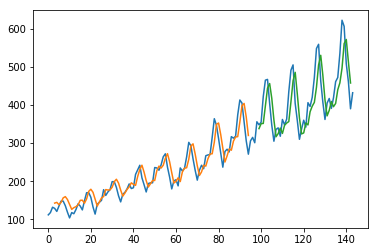

In [346]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()